In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as stat
import webbrowser
%matplotlib inline
sns.set()

# To avoid Warning message inbetween ...
import warnings
warnings.filterwarnings('ignore')

In [3]:
# The Company.csv, Company_Tweet.csv, and Tweet.csv are available at: 
# https://www.kaggle.com/datasets/omermetinn/tweets-about-the-top-companies-from-2015-to-2020/data?select=Company.csv

company_tweet = pd.read_csv('Company_Tweet.csv')
tweet = pd.read_csv('Tweet.csv')
company = pd.read_csv('Company.csv')
company_value = pd.read_csv('CompanyValues.csv')

In [4]:
def quick_analysis(df):
    print("Data info:")
    print(df.info())
    print("-------------****----------------\n\nData Types:")
    print(df.dtypes)
    print("-------------****----------------\n\nRows and Columns:")
    print(df.shape)
    print("-------------****----------------\n\nColumn names:")
    print(df.columns)
    print("-------------****----------------\n\nNull Values:")
    print(df.apply(lambda x: sum(x.isnull()) / len(df)))
    print("-------------****----------------\n\nUnique values:")
    print(df.nunique())
    print("-------------****----------------\n\nDescribes:")
    print(df.describe())
    

In [5]:
def get_eda_features(df):
    #Visual Exploratory Data Analysis (EDA) And Your First Model
    #EDA on Feature Variables
    print(list(set(df.dtypes.tolist())))
    df_object = df.select_dtypes(include=["object"]).copy()
    df_int = df.select_dtypes(include=['int64']).copy()

    categorical = df_object.columns
    numerical = df_int.columns

    print("Datashape of Object Dataframe:",df_object.shape)
    print("Datashape of Interger Dataframe:",df_int.shape)
    return categorical, numerical

In [6]:
def univariate_analysis(df, categorical, row_num=1, col_num=2):
    fig,ax = plt.subplots(row_num,col_num, figsize=(20, 5*row_num))
    for variable,subplot in zip(categorical,ax.flatten()):
        sns.countplot(df[variable],ax=subplot)
        for label in subplot.get_xticklabels():
            label.set_rotation(20)

In [7]:
def univariate_analysis_on_numerial(df, numerical, row_num=1,col_num=2):
    df[numerical].hist(bins=50,figsize=(16 + (2*row_num),20),layout=(8, col_num))

In [8]:
def column_distplot(df, column_name, bins=50, describe=True):
    if describe:
        print(df[column_name].describe())
    plt.figure(figsize=(9, 8))
    sns.distplot(df[column_name], color='g', bins=bins, hist_kws={'alpha': 0.4});

Data Exploration

In [9]:
quick_analysis(company)
company.head()

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ticker_symbol  6 non-null      object
 1   company_name   6 non-null      object
dtypes: object(2)
memory usage: 228.0+ bytes
None
-------------****----------------

Data Types:
ticker_symbol    object
company_name     object
dtype: object
-------------****----------------

Rows and Columns:
(6, 2)
-------------****----------------

Column names:
Index(['ticker_symbol', 'company_name'], dtype='object')
-------------****----------------

Null Values:
ticker_symbol    0.0
company_name     0.0
dtype: float64
-------------****----------------

Unique values:
ticker_symbol    6
company_name     5
dtype: int64
-------------****----------------

Describes:
       ticker_symbol company_name
count              6            6
unique             6            5
top             AAPL   Google Inc
freq

ticker_symbol company_name
0          AAPL        apple
1          GOOG   Google Inc
2         GOOGL   Google Inc
3          AMZN   Amazon.com
4          TSLA    Tesla Inc

In [10]:
company_categorial, company_numerical = get_eda_features(company)

[dtype('O')]
Datashape of Object Dataframe: (6, 2)
Datashape of Interger Dataframe: (6, 0)


In [11]:
company_categorial

Index(['ticker_symbol', 'company_name'], dtype='object')

In [12]:
company_numerical

Index([], dtype='object')

univariate_analysis(company, company_categorial, row_num=1, col_num=2)

In [13]:
quick_analysis(company_value)
company_value.head()

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17528 entries, 0 to 17527
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ticker_symbol  17528 non-null  object 
 1   day_date       17528 non-null  object 
 2   close_value    17528 non-null  float64
 3   volume         17528 non-null  int64  
 4   open_value     17528 non-null  float64
 5   high_value     17528 non-null  float64
 6   low_value      17528 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 958.7+ KB
None
-------------****----------------

Data Types:
ticker_symbol     object
day_date          object
close_value      float64
volume             int64
open_value       float64
high_value       float64
low_value        float64
dtype: object
-------------****----------------

Rows and Columns:
(17528, 7)
-------------****----------------

Column names:
Index(['ticker_symbol', 'day_date', 'close_value', 'volume', 'open_

ticker_symbol    day_date  close_value    volume  open_value  high_value  \
0          AAPL  2020-05-29       317.94  38399530      319.25      321.15   
1          AAPL  2020-05-28       318.25  33449100      316.77      323.44   
2          AAPL  2020-05-27       318.11  28236270      316.14      318.71   
3          AAPL  2020-05-26       316.73  31380450      323.50      324.24   
4          AAPL  2020-05-22       318.89  20450750      315.77      319.23   

   low_value  
0     316.47  
1     315.63  
2     313.09  
3     316.50  
4     315.35

In [14]:
company_value_categorial, company_value_numerical = get_eda_features(company_value)

[dtype('float64'), dtype('int64'), dtype('O')]
Datashape of Object Dataframe: (17528, 2)
Datashape of Interger Dataframe: (17528, 1)


In [15]:
company_value_categorial

Index(['ticker_symbol', 'day_date'], dtype='object')

In [16]:
company_value_categorial = company_value_categorial.drop("day_date")


In [17]:
univariate_analysis(company_value, company_value_categorial, row_num=1, col_num=2)
plt.savefig("CompanyTweetCount.png")

In [18]:
company_value_numerical

Index(['volume'], dtype='object')

count    1.752800e+04
mean     2.025441e+07
std      3.322733e+07
min      7.932000e+03
25%      2.075086e+06
50%      4.835618e+06
75%      2.704358e+07
max      4.624423e+08
Name: volume, dtype: float64


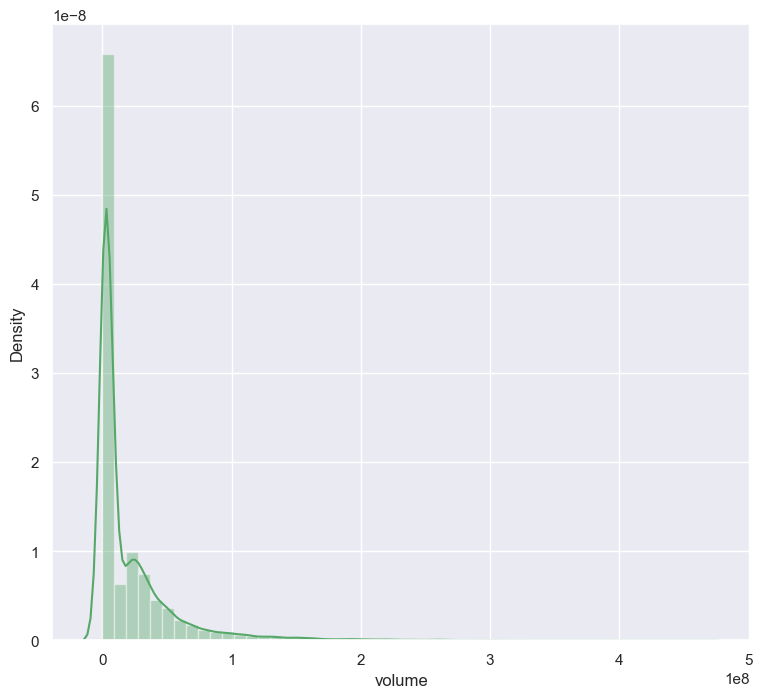

In [19]:
column_distplot(company_value, "volume")
plt.savefig("VolumevsDensity.png")

In [20]:
quick_analysis(tweet)
tweet.head()


Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3717964 entries, 0 to 3717963
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   tweet_id     int64 
 1   writer       object
 2   post_date    int64 
 3   body         object
 4   comment_num  int64 
 5   retweet_num  int64 
 6   like_num     int64 
dtypes: int64(5), object(2)
memory usage: 198.6+ MB
None
-------------****----------------

Data Types:
tweet_id        int64
writer         object
post_date       int64
body           object
comment_num     int64
retweet_num     int64
like_num        int64
dtype: object
-------------****----------------

Rows and Columns:
(3717964, 7)
-------------****----------------

Column names:
Index(['tweet_id', 'writer', 'post_date', 'body', 'comment_num', 'retweet_num',
       'like_num'],
      dtype='object')
-------------****----------------

Null Values:
tweet_id       0.000000
writer         0.012715
post_date      0.000000
body           0.000000

tweet_id           writer   post_date  \
0  550441509175443456  VisualStockRSRC  1420070457   
1  550441672312512512      KeralaGuy77  1420070496   
2  550441732014223360      DozenStocks  1420070510   
3  550442977802207232     ShowDreamCar  1420070807   
4  550443807834402816     i_Know_First  1420071005   

                                                body  comment_num  \
0  lx21 made $10,008  on $AAPL -Check it out! htt...            0   
1  Insanity of today weirdo massive selling. $aap...            0   
2  S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...            0   
3  $GM $TSLA: Volkswagen Pushes 2014 Record Recal...            0   
4  Swing Trading: Up To 8.91% Return In 14 Days h...            0   

   retweet_num  like_num  
0            0         1  
1            0         0  
2            0         0  
3            0         1  
4            0         1

In [21]:
tweet_categorial, tweet_numerical = get_eda_features(tweet)

[dtype('int64'), dtype('O')]
Datashape of Object Dataframe: (3717964, 2)
Datashape of Interger Dataframe: (3717964, 5)


In [22]:
tweet_categorial

Index(['writer', 'body'], dtype='object')

In [23]:
tweet['writer'].describe()

count     3670691
unique     140131
top       App_sw_
freq        91741
Name: writer, dtype: object

In [24]:
tweet['body'].str.split().str.len()

0          17
1          20
2          21
3          13
4          16
           ..
3717959    53
3717960    40
3717961    10
3717962     9
3717963    17
Name: body, Length: 3717964, dtype: int64

In [25]:
body_len = tweet['body'].str.split().str.len()
body_len.describe()

count    3.717964e+06
mean     1.758108e+01
std      9.618676e+00
min      1.000000e+00
25%      1.200000e+01
50%      1.500000e+01
75%      2.100000e+01
max      6.800000e+01
Name: body, dtype: float64

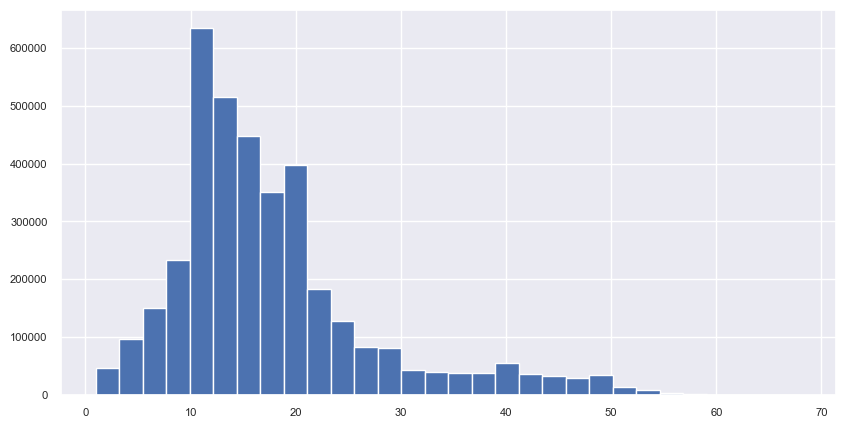

In [26]:
body_len.hist(figsize=(10, 5), bins=30, xlabelsize=8, ylabelsize=8)
plt.savefig("TweetDataHistogram.png")

In [27]:
tweet_numerical

Index(['tweet_id', 'post_date', 'comment_num', 'retweet_num', 'like_num'], dtype='object')

In [28]:
tweet_numerical = tweet_numerical.drop(['tweet_id'])

tweet_numerical

Index(['post_date', 'comment_num', 'retweet_num', 'like_num'], dtype='object')

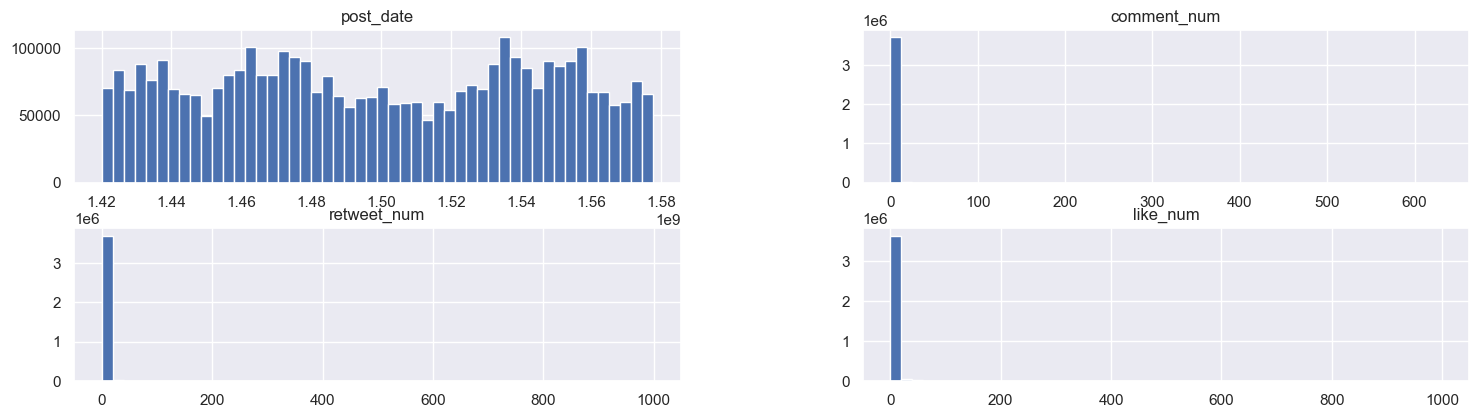

In [29]:
univariate_analysis_on_numerial(tweet, tweet_numerical)

Pre-Processing of Data

In [30]:
# preprocessing of data  
tweet_df = pd.merge(company_tweet , tweet , on="tweet_id", how= "inner")
tweet_df.head(5)

tweet_id ticker_symbol      writer   post_date  \
0  550803612197457920          AAPL  SentiQuant  1420156789   
1  550803612197457920          AMZN  SentiQuant  1420156789   
2  550803610825928706          AAPL  SentiQuant  1420156788   
3  550803610825928706         GOOGL  SentiQuant  1420156788   
4  550803610825928706          AMZN  SentiQuant  1420156788   

                                                body  comment_num  \
0  #TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...            0   
1  #TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...            0   
2  #SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...            0   
3  #SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...            0   
4  #SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...            0   

   retweet_num  like_num  
0            0         1  
1            0         1  
2            0         1  
3            0         1  
4            0         1

In [31]:
company_value.head(5)

ticker_symbol    day_date  close_value    volume  open_value  high_value  \
0          AAPL  2020-05-29       317.94  38399530      319.25      321.15   
1          AAPL  2020-05-28       318.25  33449100      316.77      323.44   
2          AAPL  2020-05-27       318.11  28236270      316.14      318.71   
3          AAPL  2020-05-26       316.73  31380450      323.50      324.24   
4          AAPL  2020-05-22       318.89  20450750      315.77      319.23   

   low_value  
0     316.47  
1     315.63  
2     313.09  
3     316.50  
4     315.35

In [32]:
tweet_df["total_engangement"] = tweet_df["comment_num"] + tweet_df["retweet_num"] + tweet_df["like_num"]

In [33]:
# histogram of total engagement on tweets and filter the low-impact tweet
column_distplot(tweet_df, column_name="total_engangement")
plt.savefig("TwitterEngagement.png")

count    4.336445e+06
mean     3.030775e+00
std      1.901432e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      1.703000e+03
Name: total_engangement, dtype: float64


In [34]:
engagement_threshold = 40

In [35]:
tweet_df = tweet_df[tweet_df["total_engangement"] > engagement_threshold]


In [36]:
tweet_df['post_date'] = pd.to_datetime(tweet_df['post_date'], unit='s')

In [37]:
tweet_df['day_date'] = pd.to_datetime(tweet_df['post_date'].apply(lambda date: date.date()))

In [38]:
tweet_df = tweet_df.sort_values(by="day_date")

In [39]:
# Company value dataset
stock_df = company_value

stock_df['day_date']  = pd.to_datetime(stock_df['day_date'])

stock_df.sample(5)


ticker_symbol   day_date  close_value     volume  open_value  \
1854           AAPL 2013-01-16      72.2985  172393952     70.6628   
5788           AMZN 2016-08-21     757.3100    2337567    761.9000   
11601          MSFT 2019-07-11     138.4000   22327940    138.2000   
14048          MSFT 2016-05-07      50.3900   24772020     49.9200   
3629           AMZN 2018-04-02    1371.9900   10432560   1417.6200   

       high_value  low_value  
1854      72.7771    70.3571  
5788     762.4900   756.8900  
11601    139.2200   137.8700  
14048     50.3900    49.6600  
3629    1421.3580  1355.0000

In [40]:
start_day = min(tweet_df['day_date'])
print(f"Start day: {start_day}")

end_day = max(tweet_df['day_date'])
print(f"End day: {end_day}")


Start day: 2015-01-01 00:00:00
End day: 2019-12-31 00:00:00


In [41]:
stock_df = stock_df[(stock_df['day_date'] >= start_day) & (stock_df['day_date'] <= end_day)]
stock_df = stock_df.sort_values(by="day_date")

In [42]:
# Data cleaning 
tweet_df = tweet_df.drop(['tweet_id', 'post_date', 'comment_num', 'retweet_num', 'like_num'], axis=1)

In [43]:
print(tweet_df.info())
print()
tweet_df.sample(5)

<class 'pandas.core.frame.DataFrame'>
Index: 54440 entries, 40 to 4336399
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ticker_symbol      54440 non-null  object        
 1   writer             53902 non-null  object        
 2   body               54440 non-null  object        
 3   total_engangement  54440 non-null  int64         
 4   day_date           54440 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.5+ MB
None



ticker_symbol          writer  \
3990410          TSLA       BullTesla   
1630138          AAPL       jimcramer   
4158970          TSLA  WintonCapPtnrs   
4073715          TSLA    markbspiegel   
4235780          TSLA  UpUpUp24223983   

                                                      body  total_engangement  \
3990410  $TSLA down $60 or 16% in 6 days and it's not c...                111   
1630138  Here's what people are missing about Apple: no...                360   
4158970  The pump is working for the lemmings and know ...                 41   
4073715  Summary of last night's $TSLA presentation:"We...                152   
4235780  my Farmers insurance for Model X was ~$1300, T...                 73   

          day_date  
3990410 2018-12-20  
1630138 2019-03-27  
4158970 2019-05-23  
4073715 2019-03-15  
4235780 2019-08-28

In [44]:
print(stock_df.info())
print()
stock_df.sample(5)

<class 'pandas.core.frame.DataFrame'>
Index: 10956 entries, 2517 to 103
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ticker_symbol  10956 non-null  object        
 1   day_date       10956 non-null  datetime64[ns]
 2   close_value    10956 non-null  float64       
 3   volume         10956 non-null  int64         
 4   open_value     10956 non-null  float64       
 5   high_value     10956 non-null  float64       
 6   low_value      10956 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 684.8+ KB
None



ticker_symbol   day_date  close_value    volume  open_value  high_value  \
392            AAPL 2018-11-05       201.59  66072170      204.30     204.390   
3195           AMZN 2019-12-19      1792.28   2738320     1780.50    1792.990   
8883          GOOGL 2016-09-24       814.96   1411216      815.14     817.000   
9206          GOOGL 2019-07-27      1245.22   6060795     1228.00    1268.394   
15372          TSLA 2016-10-17       193.96   4518331      197.05     198.390   

       low_value  
392       198.17  
3195     1774.06  
8883      812.73  
9206     1228.00  
15372     192.00

In [45]:
import nltk                             
# from nltk.corpus import twitter_samples                            
# from nltk.corpus import stopwords 
# from nltk.stem import PorterStemmer
# from nltk.tokenize import TweetTokenizer  

import random  
import re                     
import string

In [46]:
tweets = tweet_df["body"]
tweets

40         This is Wall Street's top pick in 2015. Hint: ...
47         See how tech companies like Apple, Twitter and...
242        Top Stock Analyst Releases Report on Top Stock...
243        Analyst Report on Top Stock Market Options for...
244        Analyst Report on Top Stock Market Options for...
                                 ...                        
4335656    Not some conspiracy theory, btw. @PlainSite pu...
4335644    Tesla China-Made Model 3 has reached over 1,50...
4335624    Repeat after me: $TSLA is the only company in ...
4335587    ‘Save Clips on Honk’ function records a flying...
4336399    $TSLA Interesting...$93M trade after hours!Whe...
Name: body, Length: 54440, dtype: object

In [47]:
def remove_special_character(tweet):
#     print(tweet)
    # remove the old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)

    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)

    # remove hashtags. only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)

    # remove single numeric terms in the tweet. 
    tweet = re.sub(r'[0-9]', '', tweet)
    
    return tweet

In [48]:
tweet_df["tweet"] = tweet_df["body"].apply(lambda tweet: remove_special_character(tweet))
tweet_df["tweet"] = tweet_df["tweet"].str.lower()
tweet_df[["body", "tweet"]].sample(10)

body  \
3967192  Cute animals make everything better. Happy Mon...   
3829884  $TSLA board release, two critical notes:1) ref...   
3341400  As of this week, the two most valuable compani...   
3922530  Added to my short position this morning.  Larg...   
3731164  Interesting battery insights on  $TSLA conf ca...   
3973102  $TSLA short interest is $9.55 bn, 27.78 mm sha...   
3302042  Gamer transforms #XboxOneX into a portable lap...   
3796937  @elonmusk weekend twitter costing #Tesla share...   
3784767  "I been short this sht for months and lossing ...   
4151278      “This is becoming a no brainer.” $TSLA #Agree   

                                                     tweet  
3967192  cute animals make everything better. happy mon...  
3829884  $tsla board release, two critical notes:) refe...  
3341400  as of this week, the two most valuable compani...  
3922530  added to my short position this morning.  larg...  
3731164  interesting battery insights on  $tsla conf ca...  
3973102  $tsla short interest is $. bn, . mm shares sho...  
3302042  gamer transforms xboxonex into a portable lapt...  
3796937  @elonmusk weekend twitter costing tesla shareh...  
3784767  "i been short this sht for months and lossing ...  
4151278       “this is becoming a no brainer.” $tsla agree

Model Building

In [49]:
from afinn import Afinn
afinn = Afinn()

In [50]:
tweet_df['afinn_score'] = tweet_df['tweet'].apply(lambda tweet: afinn.score(tweet))
tweet_df['afinn_score'].sample(5)

4088793    0.0
2804359    0.0
2992610    8.0
2414342    4.0
4202377   -2.0
Name: afinn_score, dtype: float64

In [51]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vanderSentimentAnalyzer = SentimentIntensityAnalyzer()

In [52]:
def getVanderScore(tweet):    
    vs = vanderSentimentAnalyzer.polarity_scores(tweet)
    score = vs['compound']
    return score

def getVanderSentiment(score):    
    if (score >= 0.05): 
        return "Positive"
    
    elif (score < 0.05 and score > -0.05):
        return "Neutral"
    
    elif (score <= -0.05):    
        return "Negative"
    
    return score

In [53]:
tweet_df['vander_score'] = tweet_df['body'].apply(lambda tweet: getVanderScore(tweet))
tweet_df['vander_sentiment'] = tweet_df['vander_score'].apply(lambda score: getVanderSentiment(score))
tweet_df[['ticker_symbol', 'day_date', 'vander_score', 'vander_sentiment']].sample(10)


ticker_symbol   day_date  vander_score vander_sentiment
4264759          TSLA 2019-10-11        0.6705         Positive
2375634          AMZN 2017-03-29        0.0000          Neutral
3931334          TSLA 2018-10-11       -0.6369         Negative
3794707          TSLA 2018-07-14        0.6124         Positive
2669802          AMZN 2016-04-28        0.7269         Positive
4055284          TSLA 2019-03-01        0.5574         Positive
3917511          TSLA 2018-10-02        0.0000          Neutral
3032101          AMZN 2019-03-28        0.3818         Positive
3775118          TSLA 2018-06-25       -0.2960         Negative
3688110          TSLA 2018-01-22        0.4939         Positive

Data Analysis

Sentiment score of apple company




--------------


Sentiment score of Amazon.com company


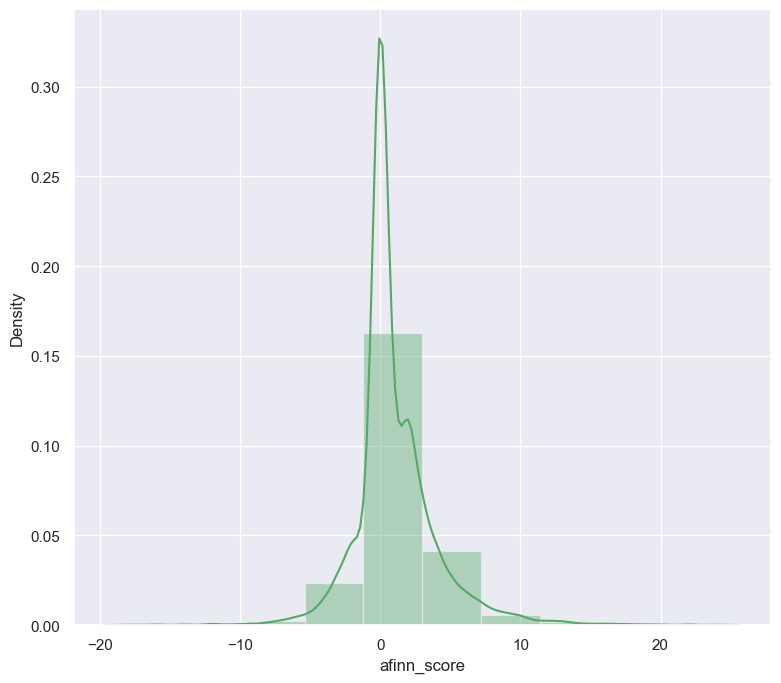

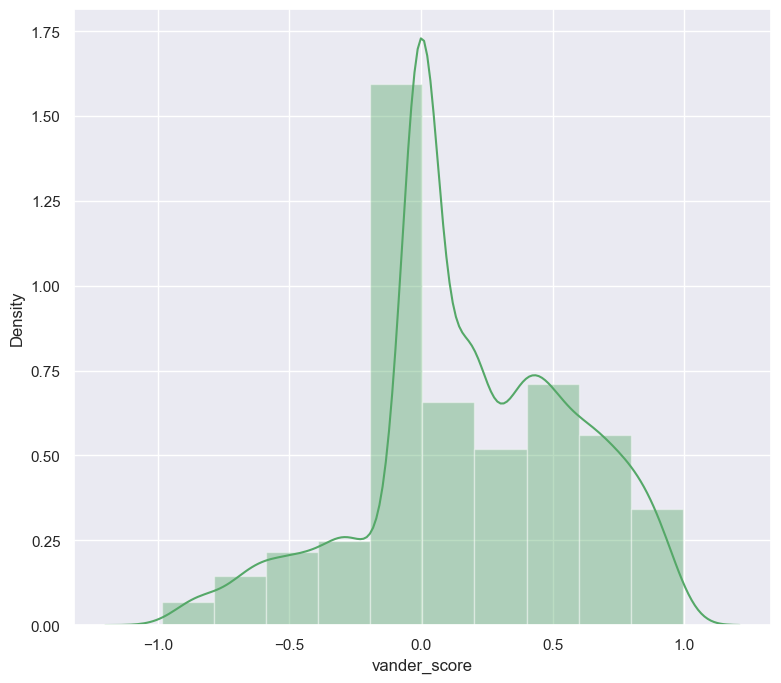



--------------


Sentiment score of Google Inc company


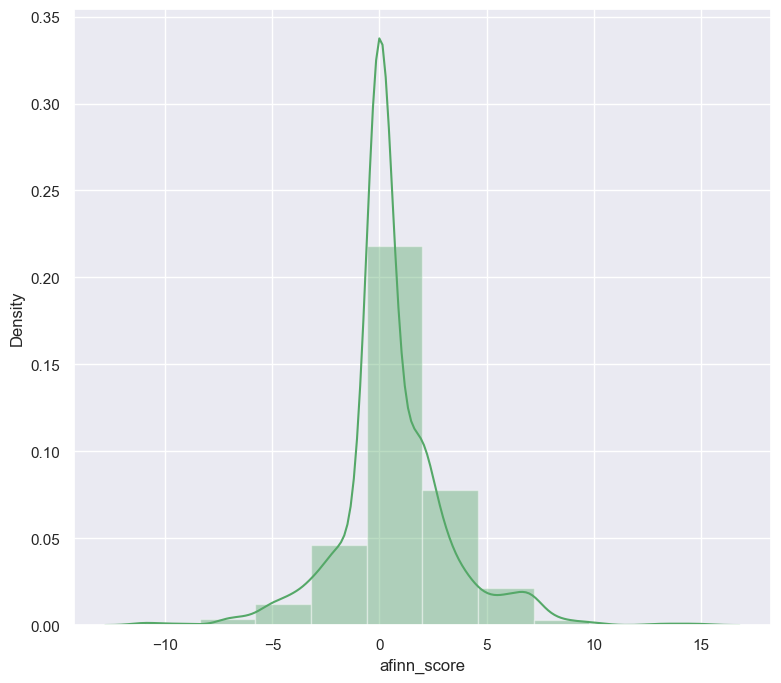

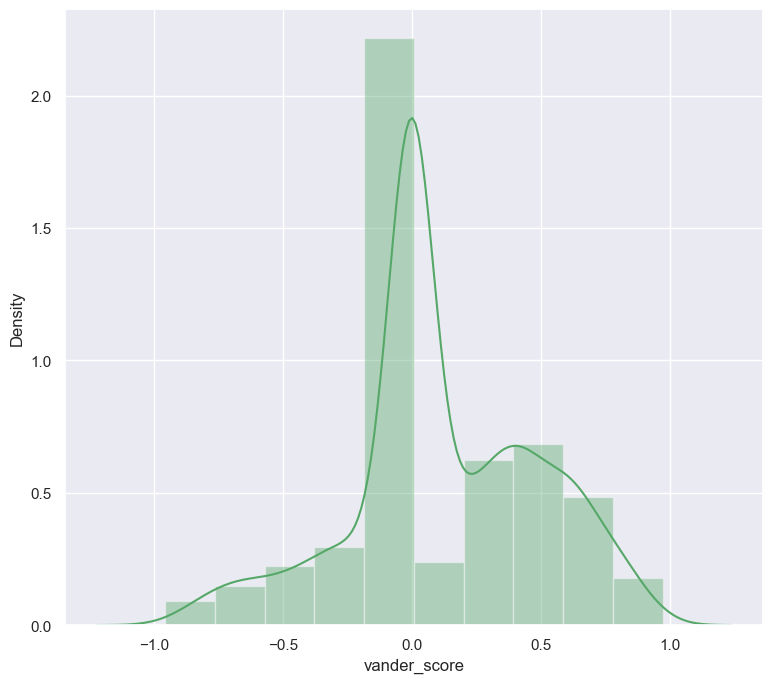



--------------


Sentiment score of Google Inc company


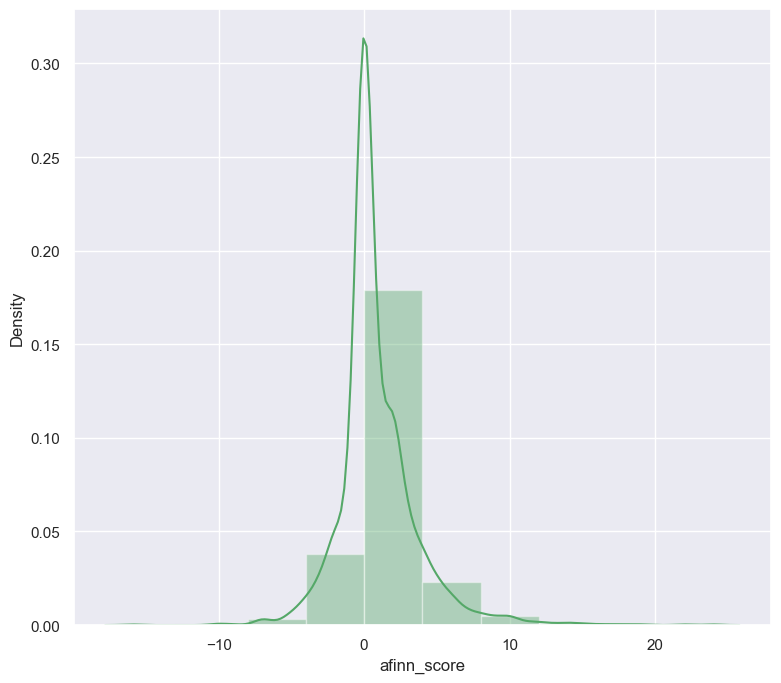



--------------


Sentiment score of Microsoft company


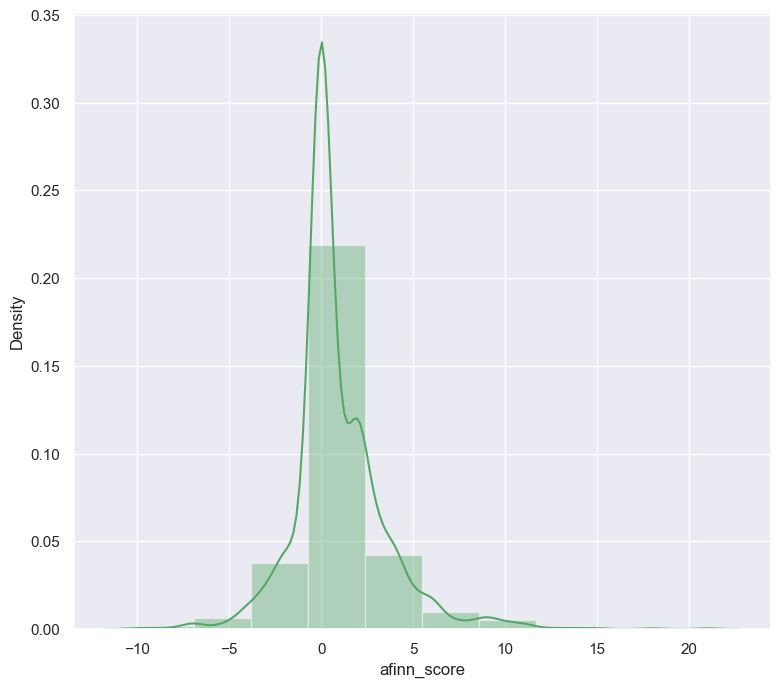

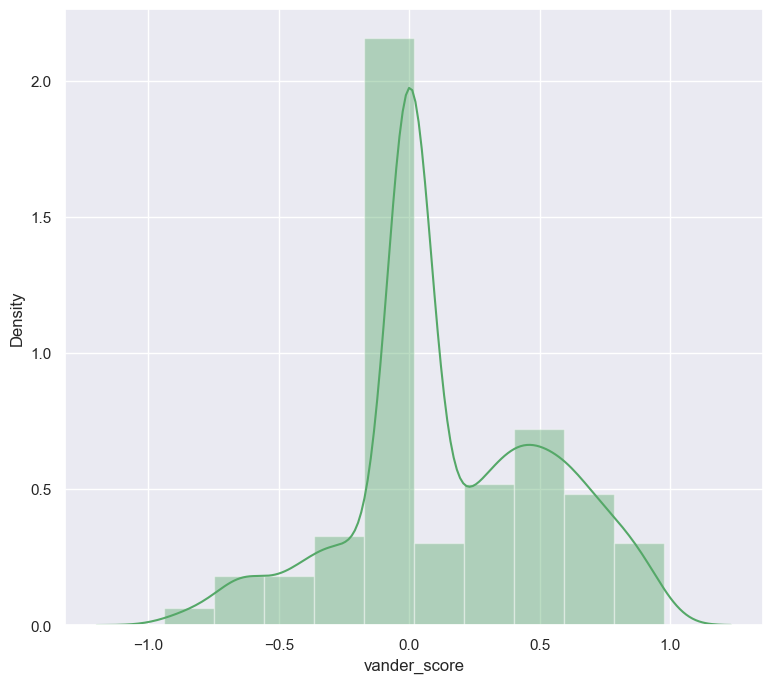



--------------


Sentiment score of Tesla Inc company


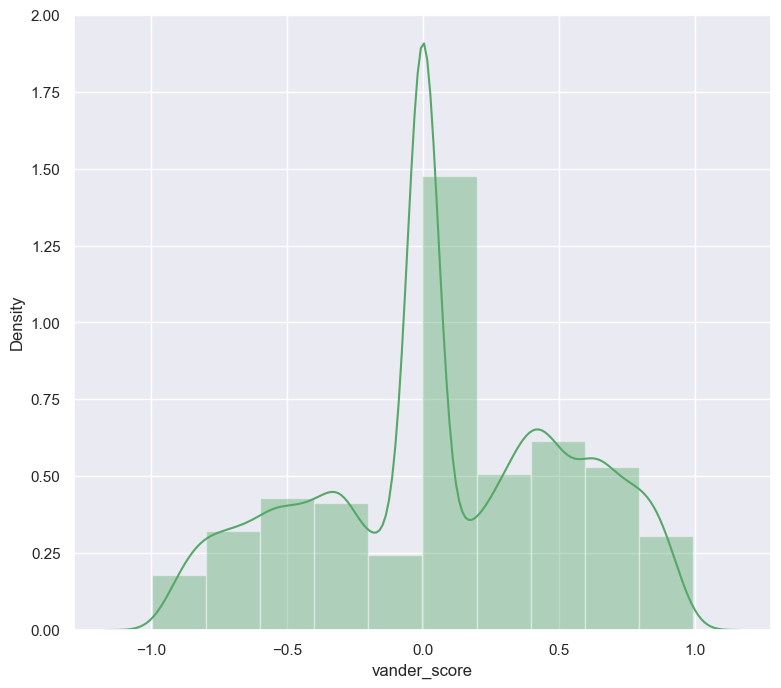



--------------




In [54]:
import time

for ticker_symbol in tweet_df["ticker_symbol"].unique():
    
    company_name = company[company["ticker_symbol"] == ticker_symbol]["company_name"].iloc[0]
    print(f"Sentiment score of {company_name} company")
    sub_tweet_df = tweet_df[tweet_df["ticker_symbol"] == ticker_symbol]
    
    column_distplot(sub_tweet_df, column_name="afinn_score", bins=10, describe=False)
    plt.savefig(f'{company_name}_Afinn.png')
    column_distplot(sub_tweet_df, column_name="vander_score", bins=10, describe=False)
    plt.savefig(f'{company_name}_vader.png')
    plt.show()
    
    print("\n\n--------------\n\n")


In [55]:
def sentiment_overtime(tweet_df, stock_df, title, score_column_name="score"):
    print("\n\n")
    fig = plt.figure(figsize=(24,10))
    ax1 = fig.add_subplot()
    ax2 = ax1.twinx()
    
#     ax1.plot(tweet_df['day_date'], tweet_df[score_column_name], label='Tweets Sentiment')
    ax1.vlines(tweet_df['day_date'], 0, tweet_df[score_column_name]) 
    ax1.axhline(y=0, color='r', linestyle='-')

    
    ax2.plot(stock_df['day_date'], stock_df['close_value'], color='orange', label='Stock price')
    ax2.set_title("Effects of " + title +" tweets to stock price")
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    
    ax1.set_xlabel('Day date')
    ax1.set_ylabel('Sentiment Afinn score', color="blue")
    
    ax2.legend(lines + lines2, labels + labels2, loc=2)
    
#     center_y = max(stock_df['close_value']) - min(stock_df['close_value']) / 2
#     print(center_y)
    plt.show()   

In [56]:
ticker_symbols =  tweet_df["ticker_symbol"].unique()

In [57]:
def draw_stock_price_with_sentiment(tweet_df, stock_df, start_day, end_day, score_name="score"):
    for ticker_symbol in ticker_symbols:
        print(f"Ticker symbol: {ticker_symbol}")
        
        sub_company = company[company["ticker_symbol"] == ticker_symbol]["company_name"]
        if len(sub_company) != 1:
            continue

        company_name = sub_company.iloc[0]
    #     print(company_name)

        print(f"Stock price of {company_name} company with ticker symbol is {ticker_symbol}")
        
        sub_tweet_df = tweet_df[tweet_df["ticker_symbol"] == ticker_symbol]
        sub_tweet_df = sub_tweet_df[(sub_tweet_df["day_date"]>=pd.to_datetime(start_day)) & (sub_tweet_df["day_date"]<=pd.to_datetime(end_day))]
        
    #     print(sub_tweet_df[:5])
        sub_stock_df = stock_df[stock_df["ticker_symbol"] == ticker_symbol]
        sub_stock_df = sub_stock_df[(sub_stock_df["day_date"]>=pd.to_datetime(start_day)) & (sub_stock_df["day_date"]<=pd.to_datetime(end_day))]
    #     print(sub_stock_df[:5])
    
        sentiment_overtime(sub_tweet_df, sub_stock_df, company_name, score_column_name=score_name)

Ticker symbol: AAPL
Stock price of apple company with ticker symbol is AAPL





Ticker symbol: AMZN
Stock price of Amazon.com company with ticker symbol is AMZN





Ticker symbol: GOOG
Stock price of Google Inc company with ticker symbol is GOOG





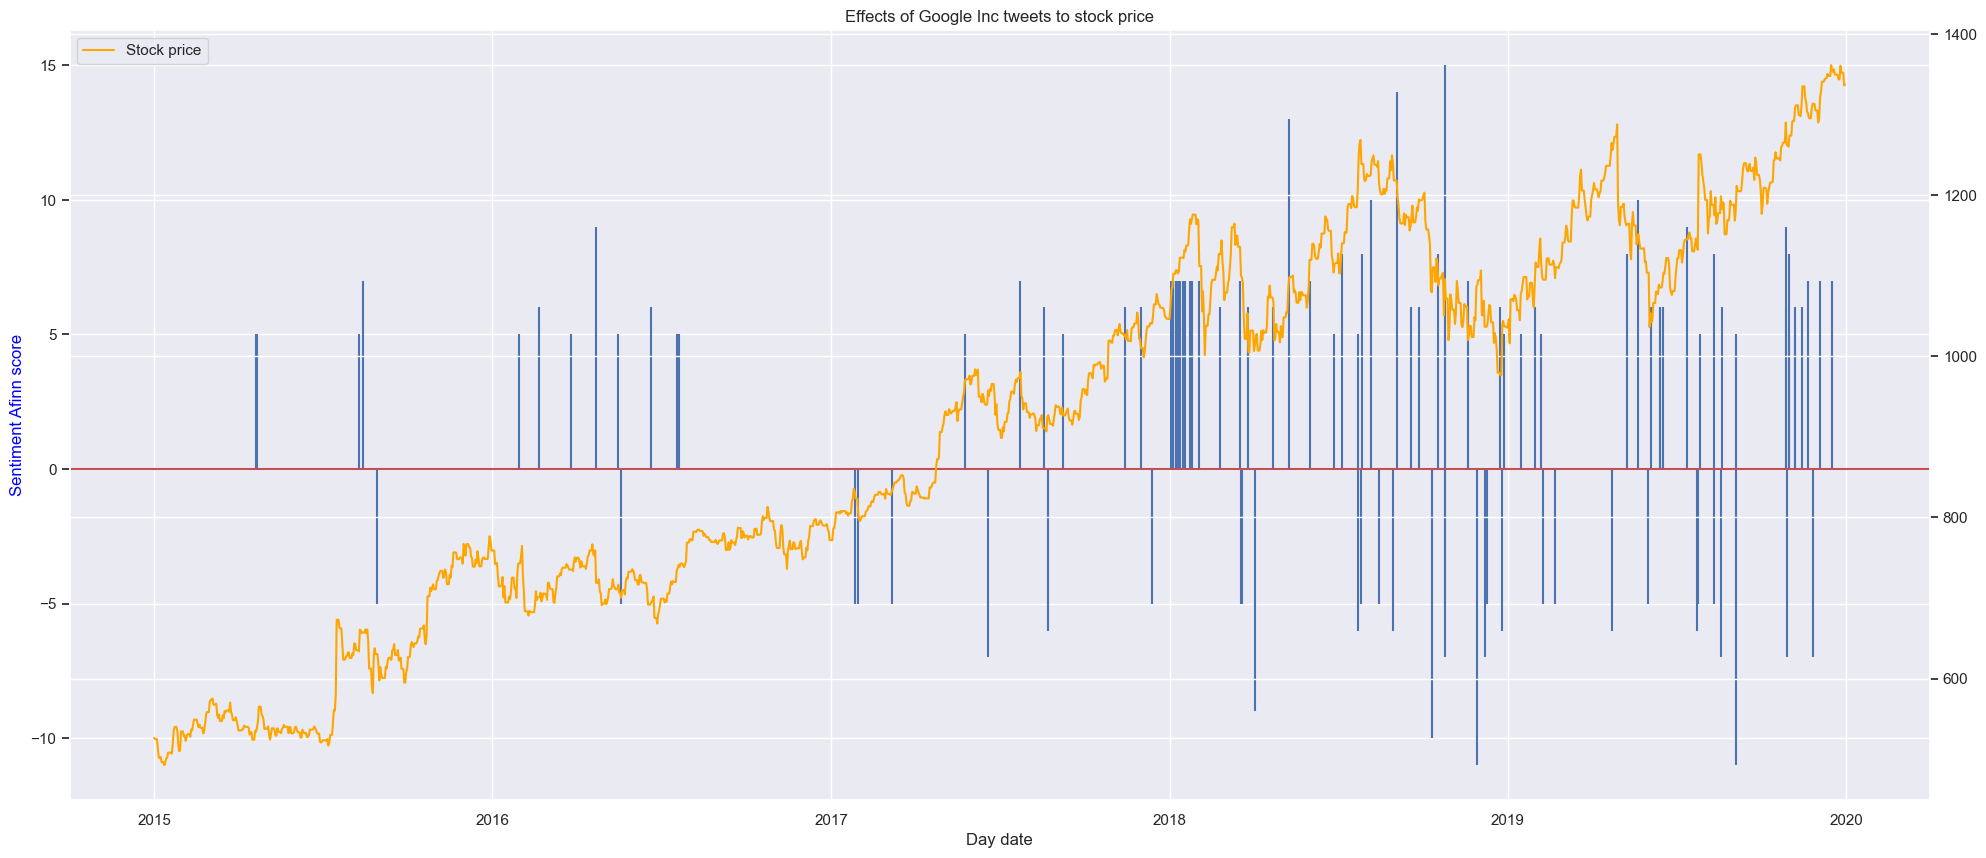

Ticker symbol: GOOGL
Stock price of Google Inc company with ticker symbol is GOOGL





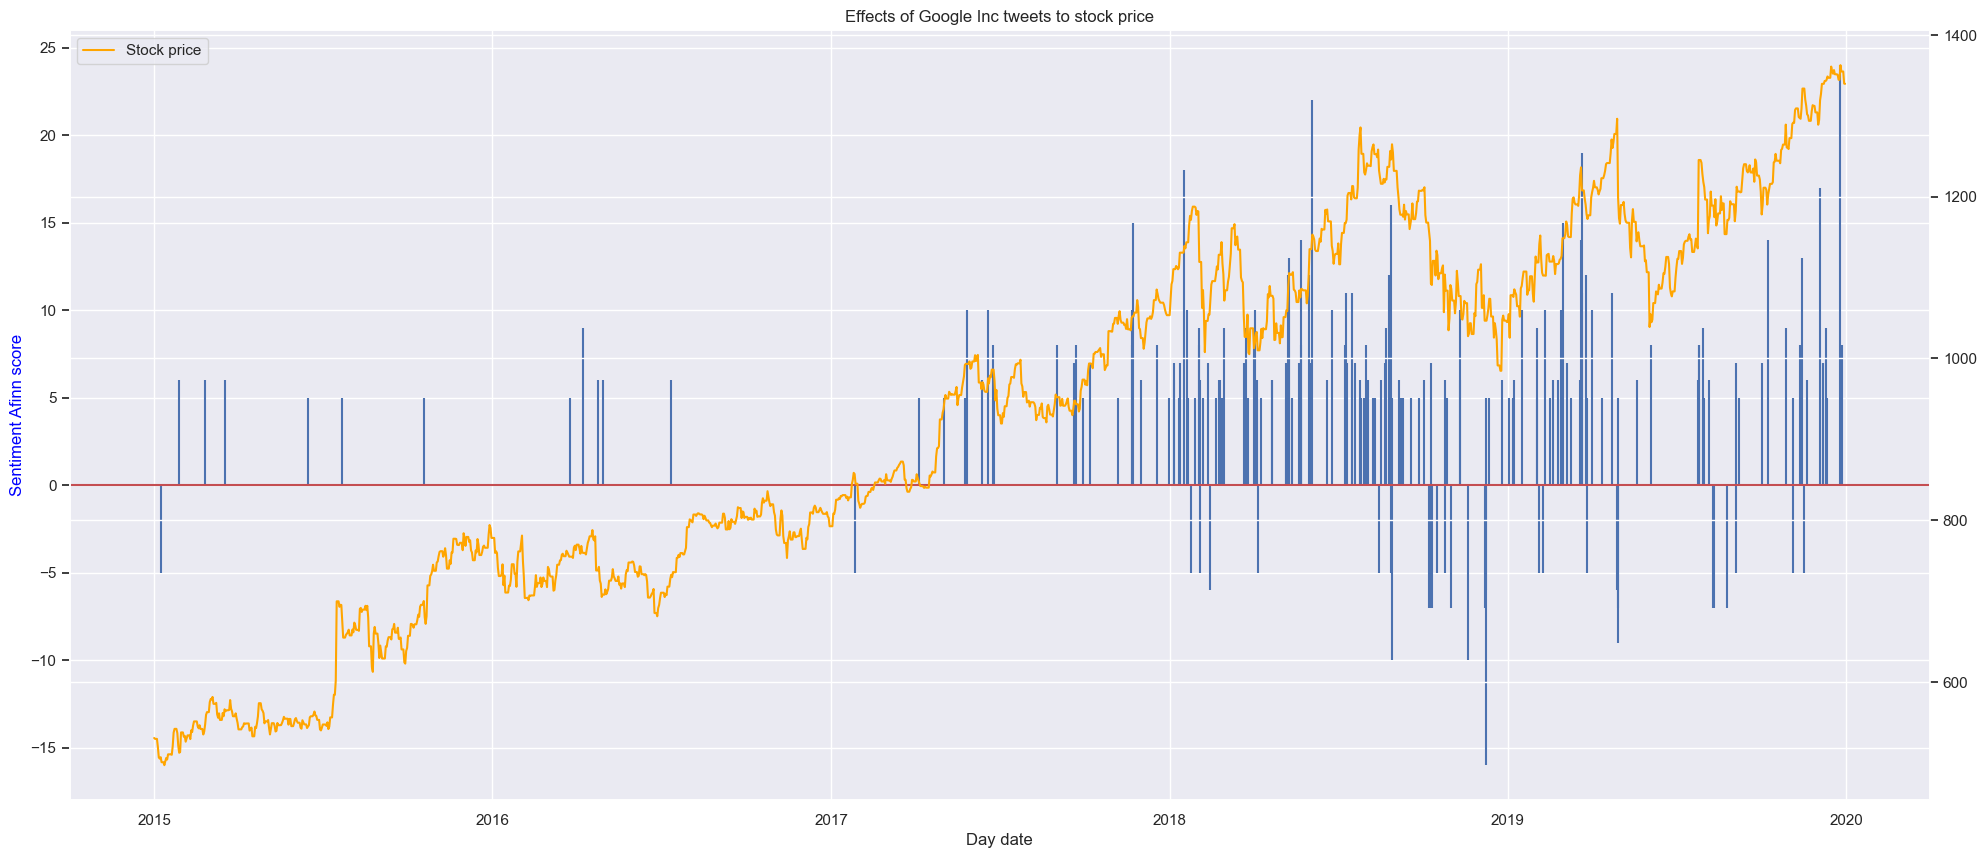

Ticker symbol: MSFT
Stock price of Microsoft company with ticker symbol is MSFT





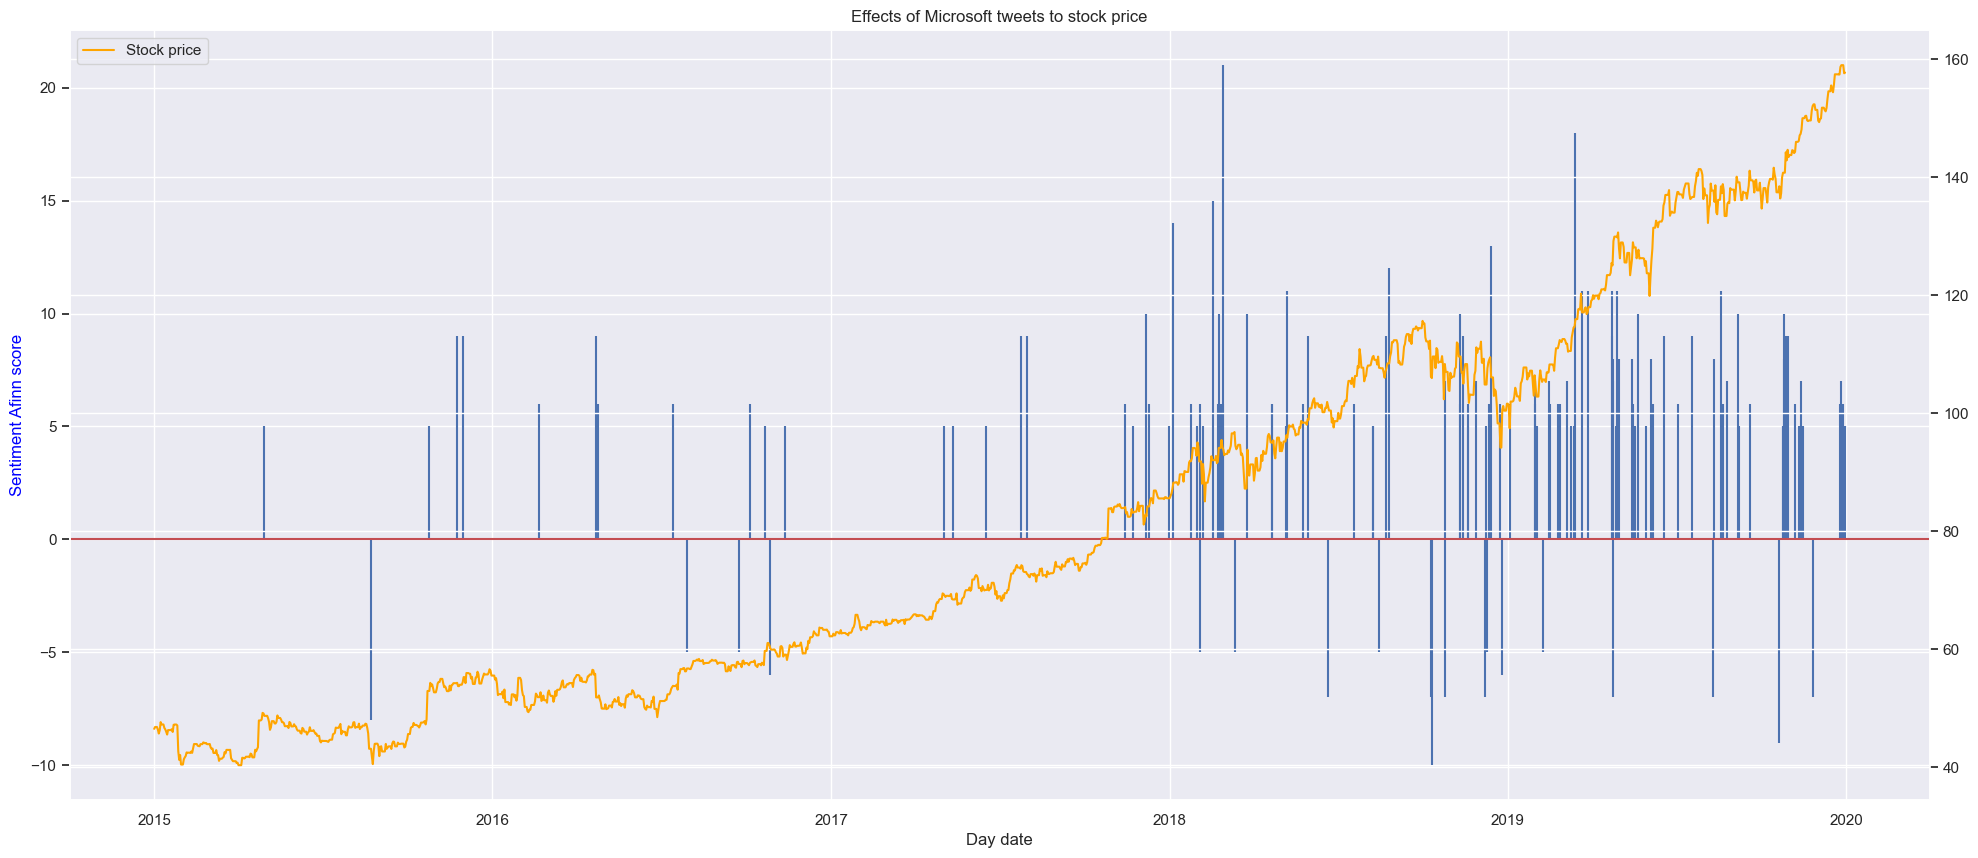

Ticker symbol: TSLA
Stock price of Tesla Inc company with ticker symbol is TSLA





In [58]:
score_threshold = 5
tmp_tweet_df = tweet_df[(tweet_df['afinn_score']<=-score_threshold) | (tweet_df['afinn_score']>=score_threshold)]
# tmp_tweet_df = tweet_df


draw_stock_price_with_sentiment(tmp_tweet_df, stock_df,start_day= min(stock_df['day_date']), end_day= max(stock_df['day_date']), score_name="afinn_score")

In [59]:
start_day = "2019-6-1"
end_day = "2020-1-1"

Ticker symbol: AAPL
Stock price of apple company with ticker symbol is AAPL





Ticker symbol: AMZN
Stock price of Amazon.com company with ticker symbol is AMZN





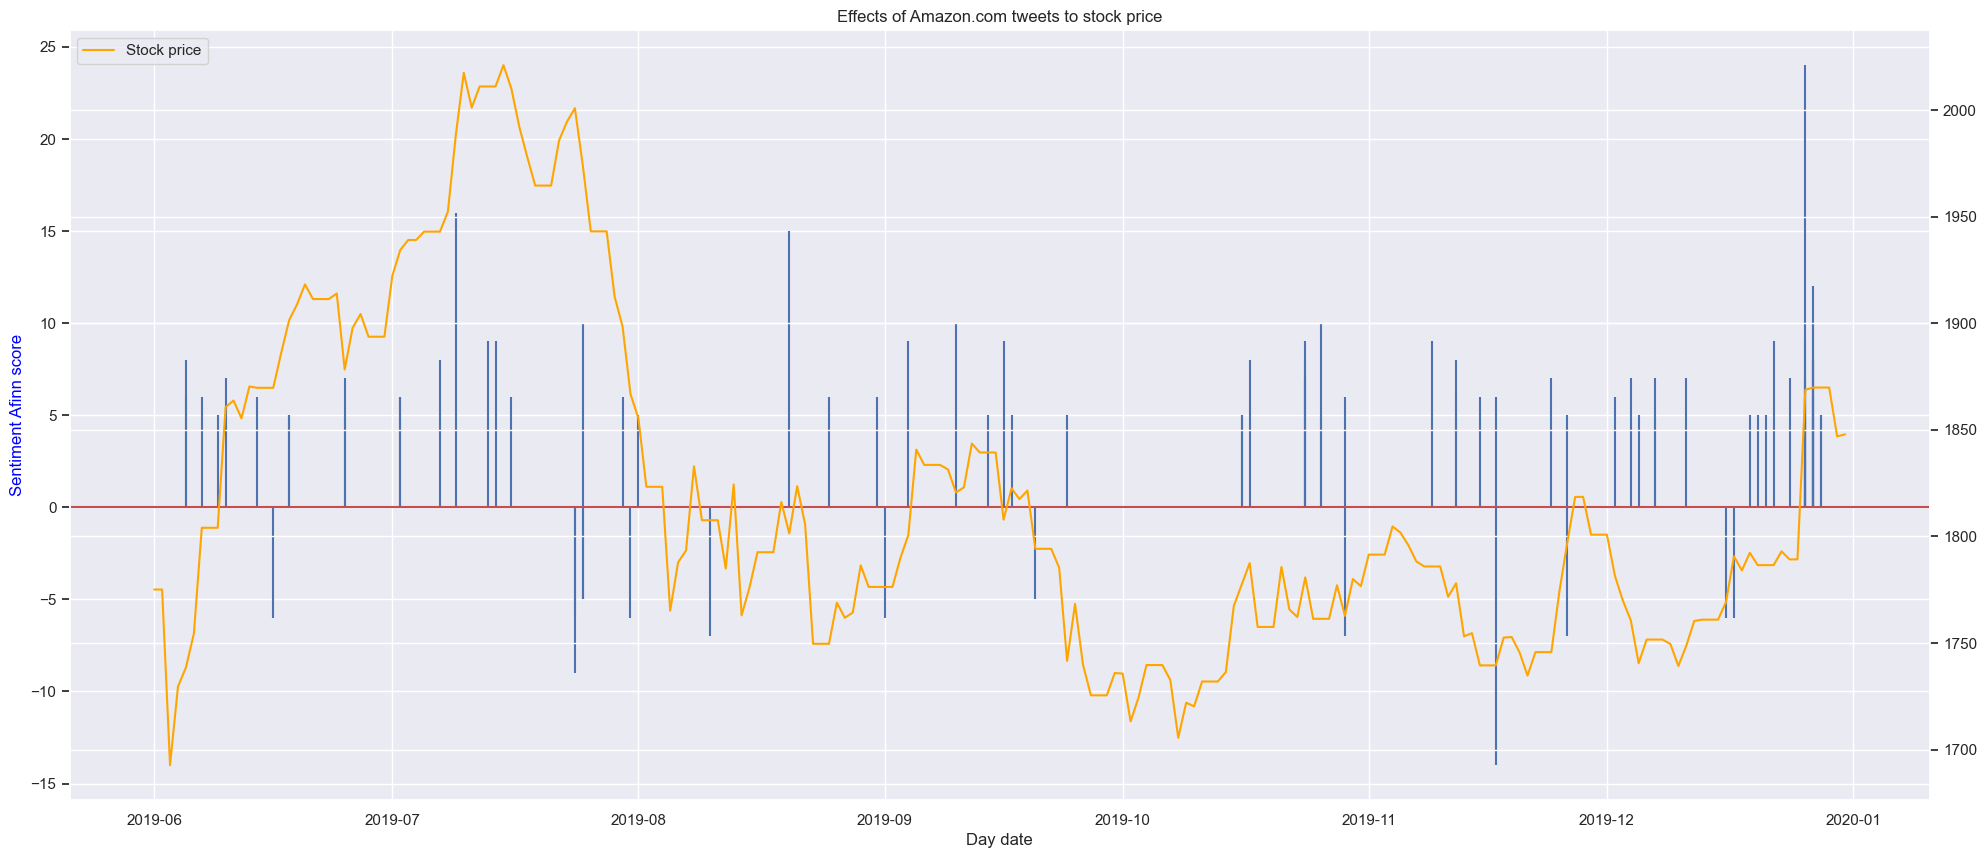

Ticker symbol: GOOG
Stock price of Google Inc company with ticker symbol is GOOG





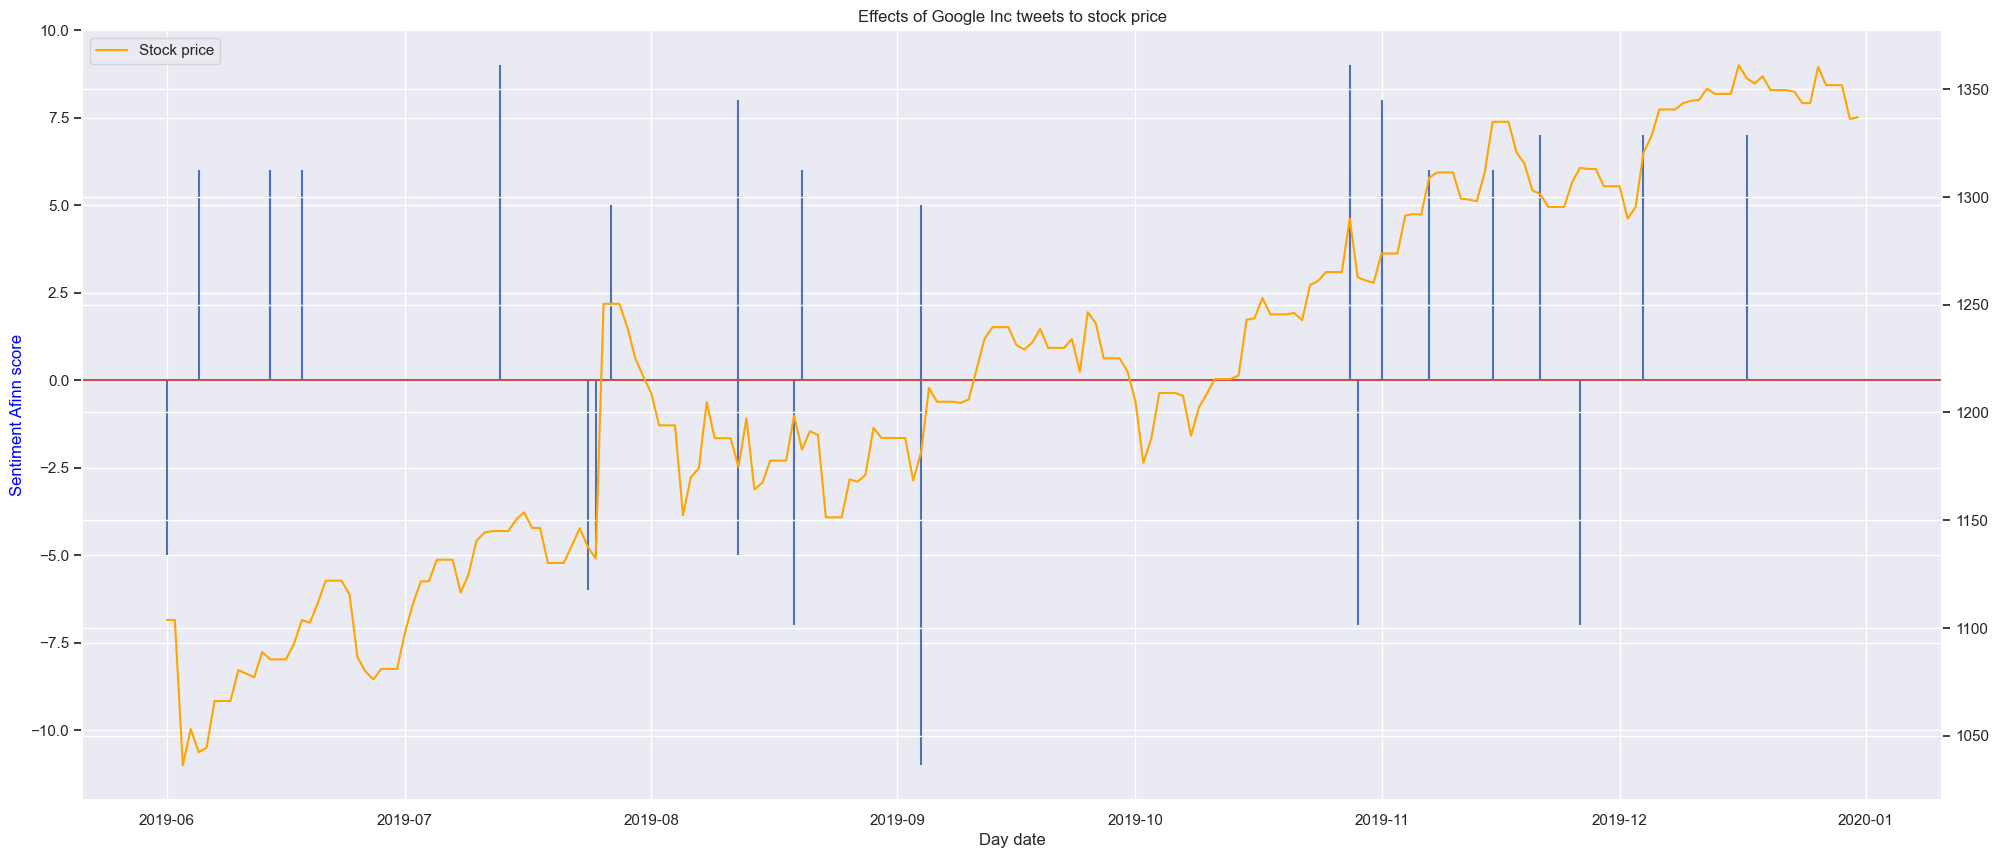

Ticker symbol: GOOGL
Stock price of Google Inc company with ticker symbol is GOOGL





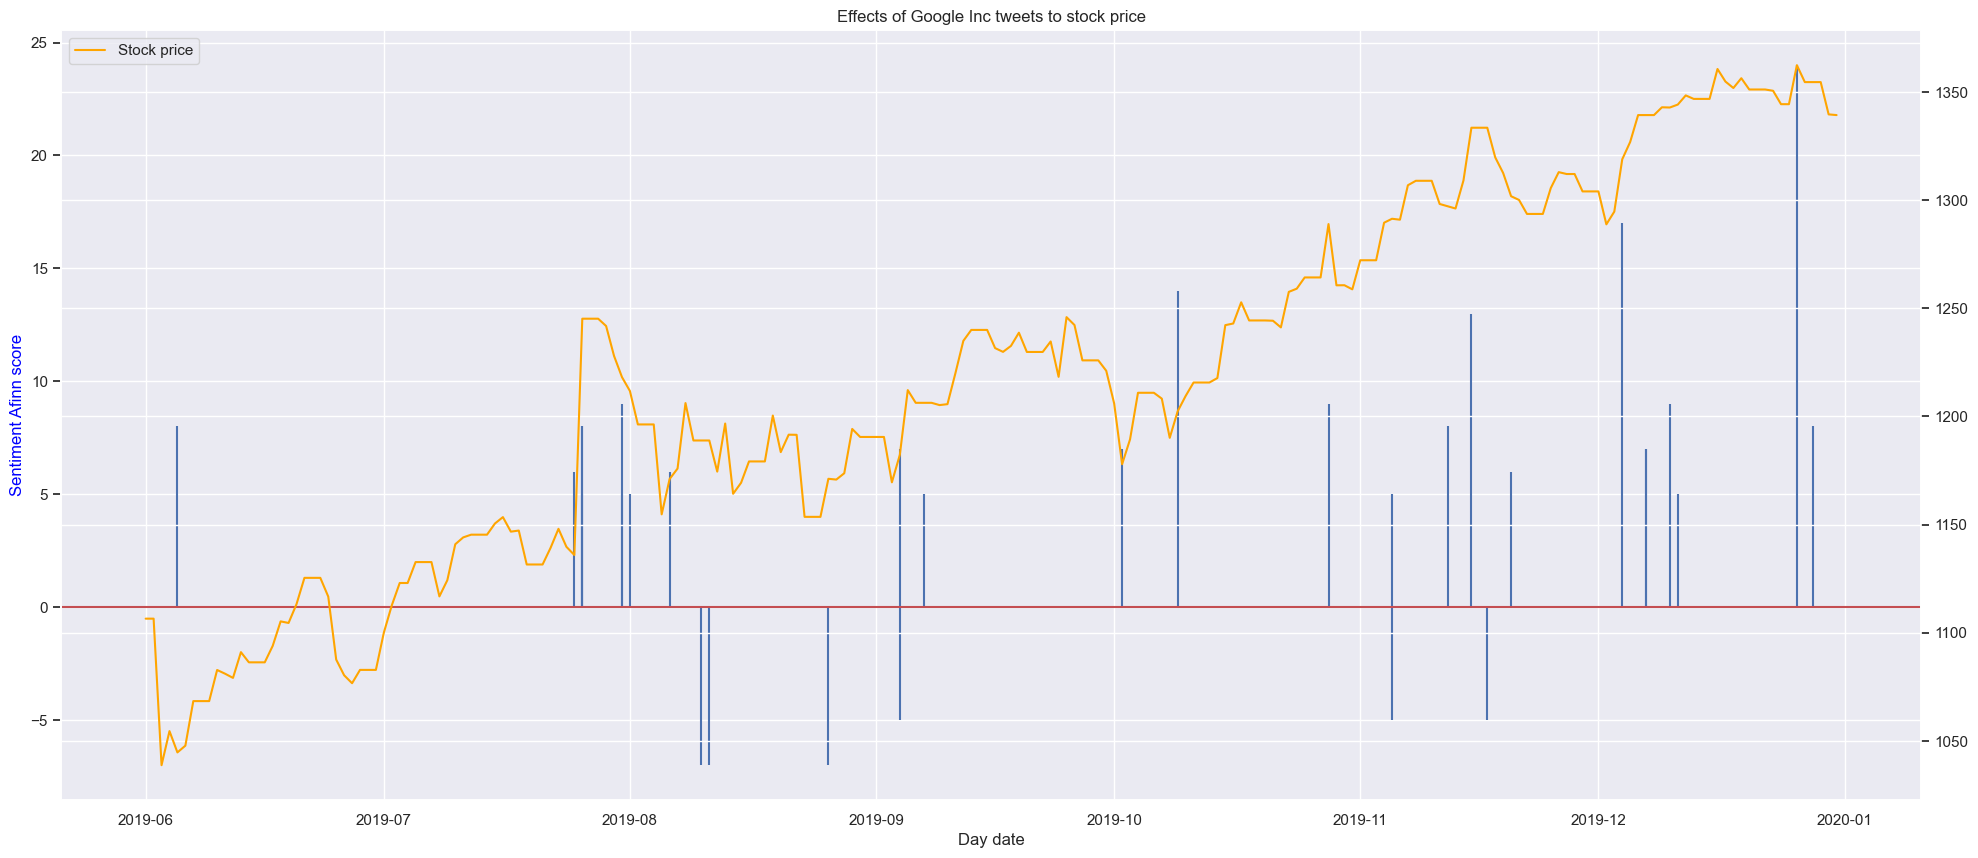

Ticker symbol: MSFT
Stock price of Microsoft company with ticker symbol is MSFT





Ticker symbol: TSLA
Stock price of Tesla Inc company with ticker symbol is TSLA





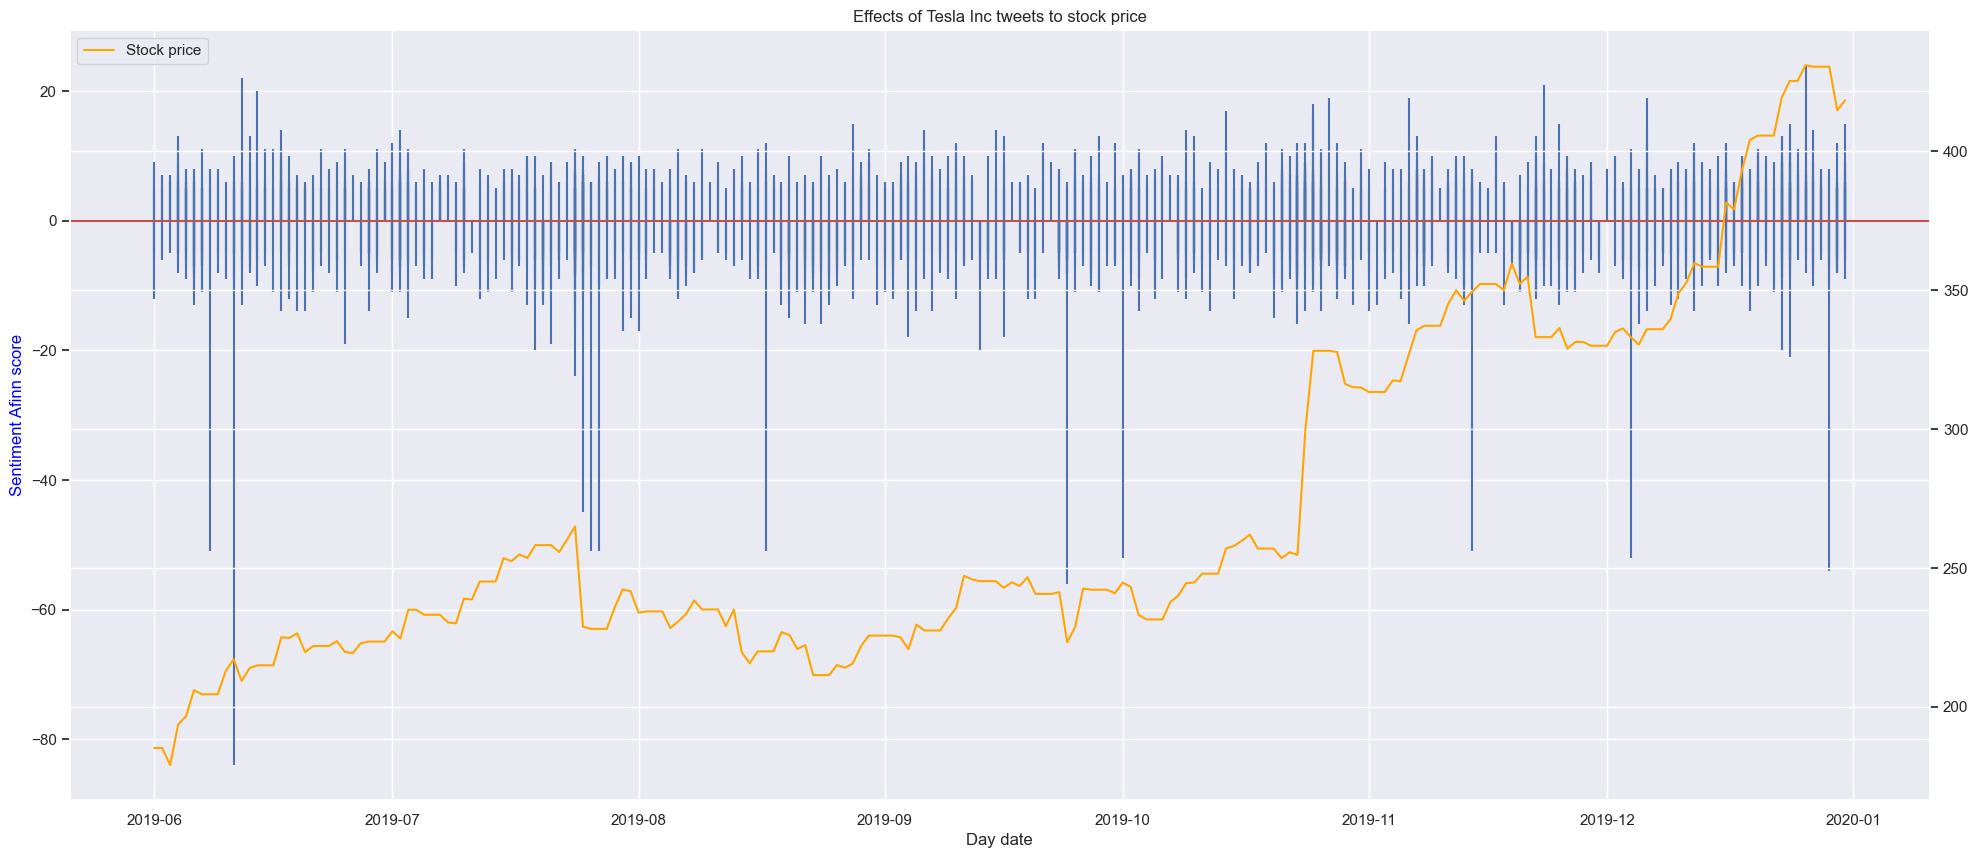

In [60]:
score_threshold = 5
tmp_tweet_df = tweet_df[(tweet_df['afinn_score']<=-score_threshold) | (tweet_df['afinn_score']>=score_threshold)]
draw_stock_price_with_sentiment(tmp_tweet_df, stock_df, start_day,end_day, score_name="afinn_score")

Ticker symbol: AAPL
Stock price of apple company with ticker symbol is AAPL





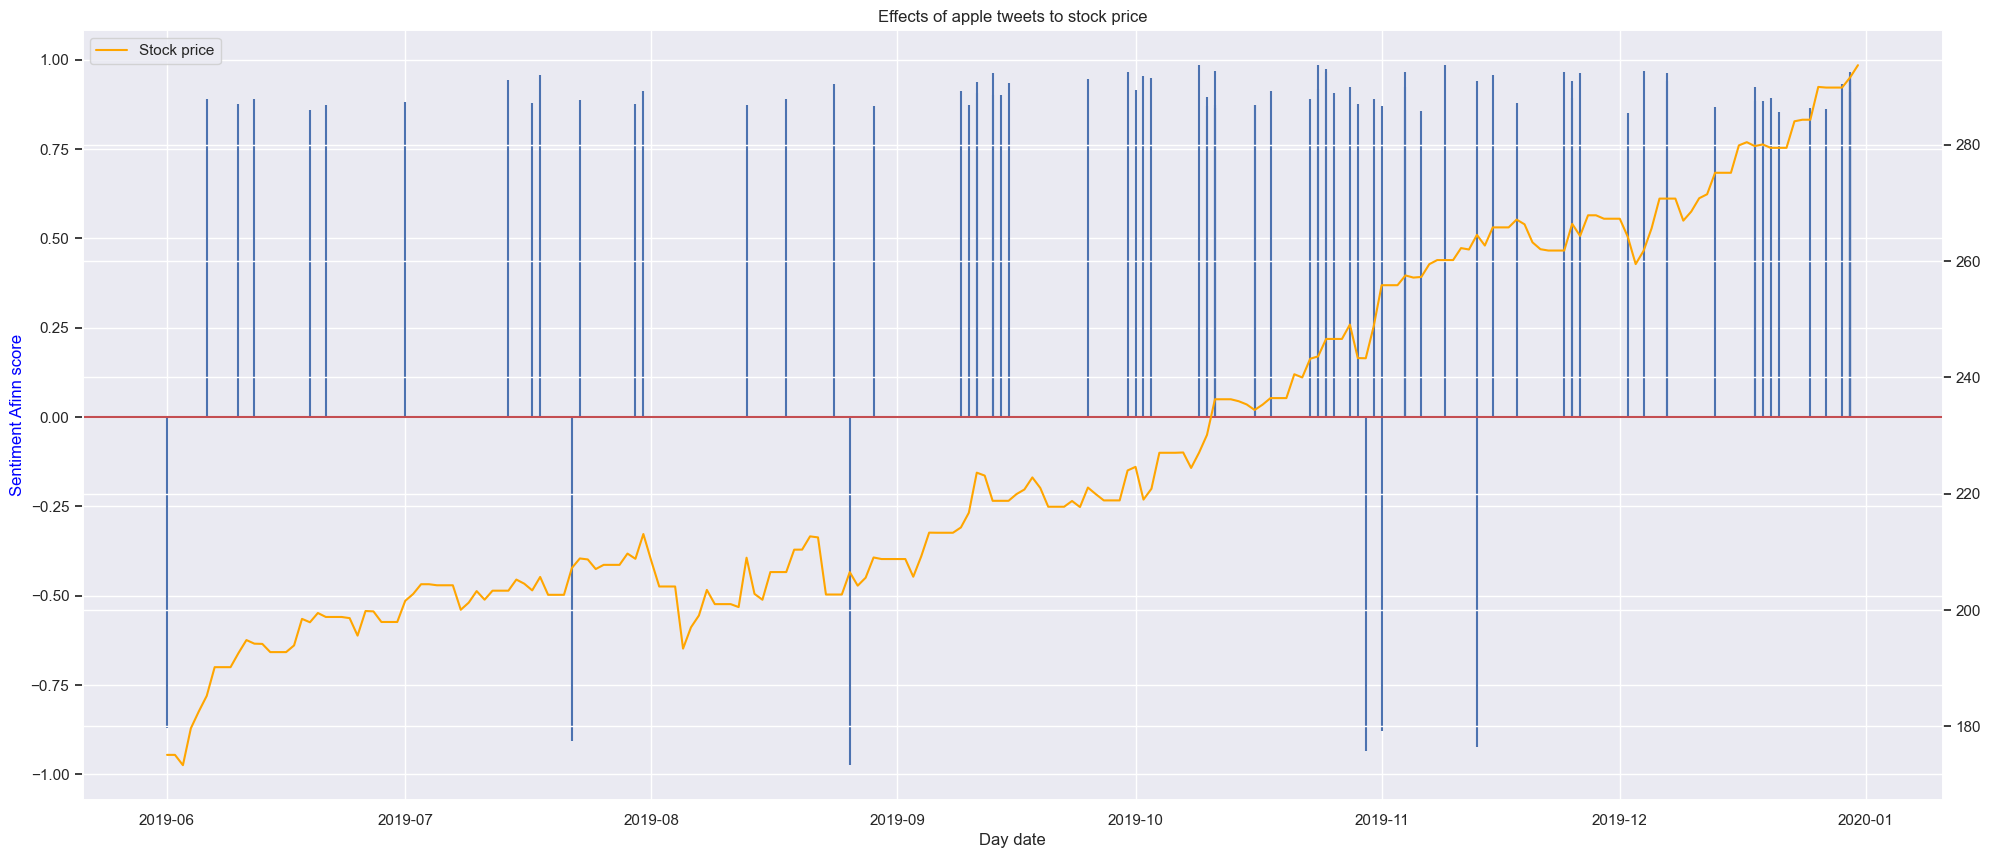

Ticker symbol: AMZN
Stock price of Amazon.com company with ticker symbol is AMZN





Ticker symbol: GOOG
Stock price of Google Inc company with ticker symbol is GOOG





Ticker symbol: GOOGL
Stock price of Google Inc company with ticker symbol is GOOGL





Ticker symbol: MSFT
Stock price of Microsoft company with ticker symbol is MSFT





Ticker symbol: TSLA
Stock price of Tesla Inc company with ticker symbol is TSLA





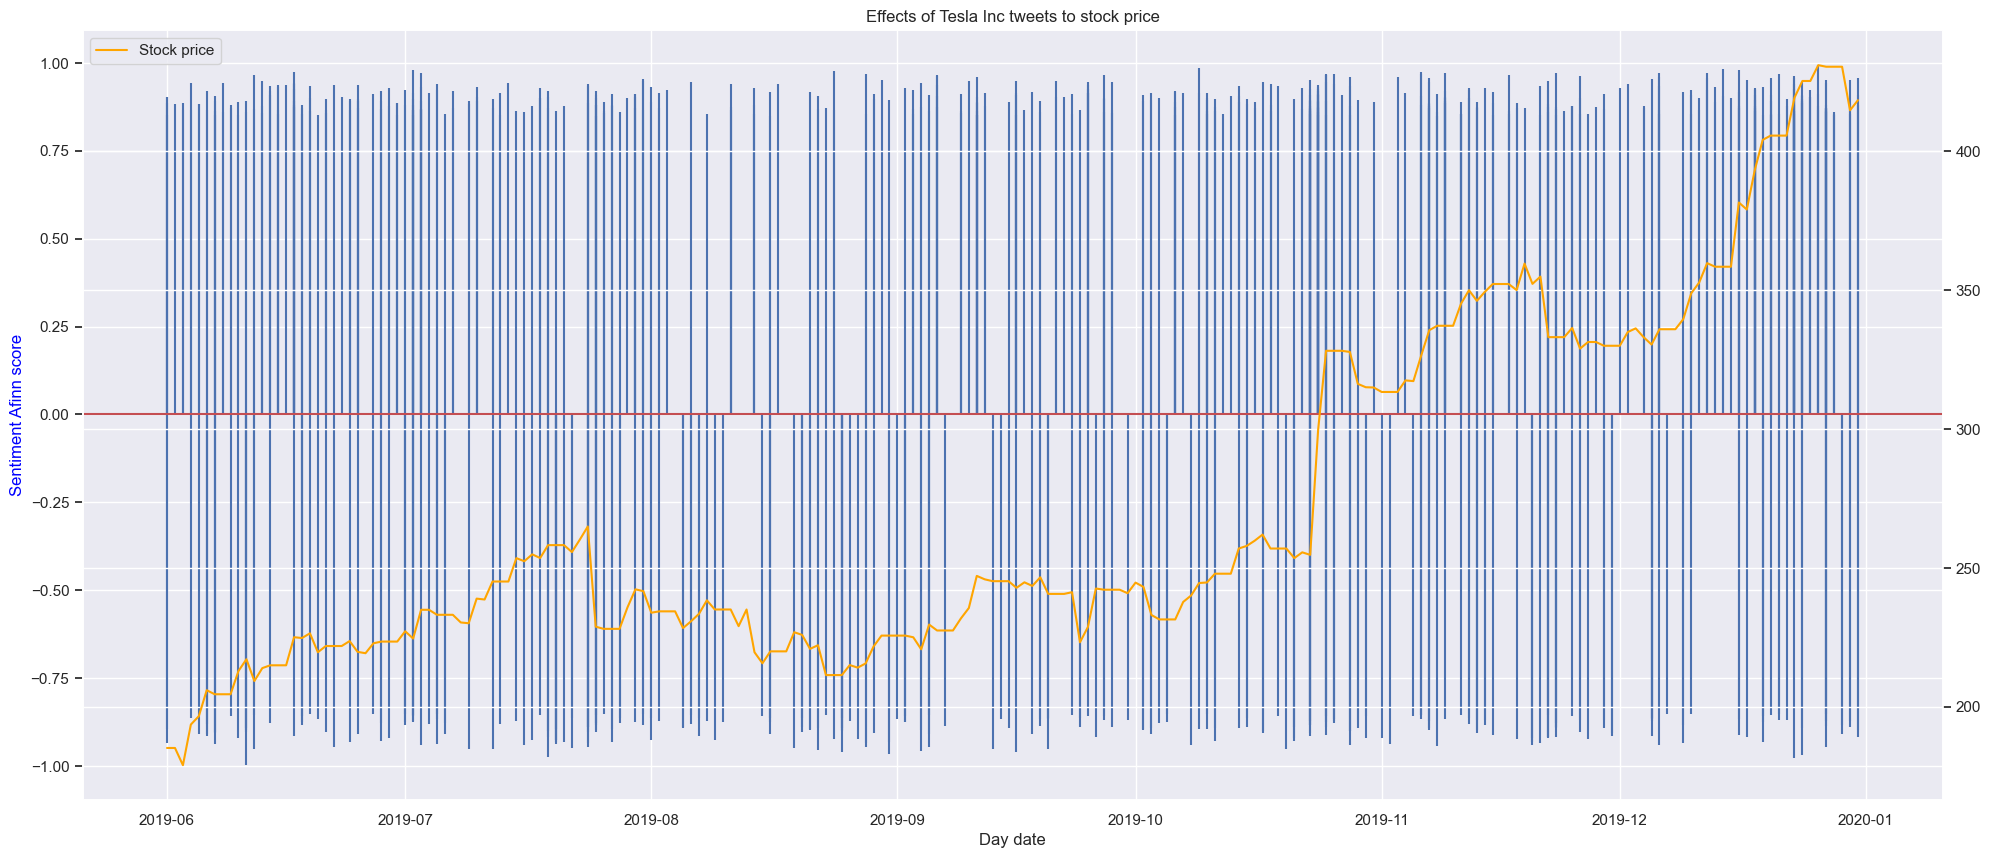

In [61]:
score_threshold = 0.85
tmp_tweet_df = tweet_df[(tweet_df['vander_score']<=-score_threshold) | (tweet_df['vander_score']>=score_threshold)]


draw_stock_price_with_sentiment(tmp_tweet_df, stock_df, start_day, end_day, score_name="vander_score")

HTML Call

In [62]:
webbrowser.open_new_tab('LatestHoverindex.html')

True